In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [3]:
# load the iris dataset from sklearn
iris = load_iris()

# convert the dataset into a dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['label'] = iris.target
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

print(data)

     sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


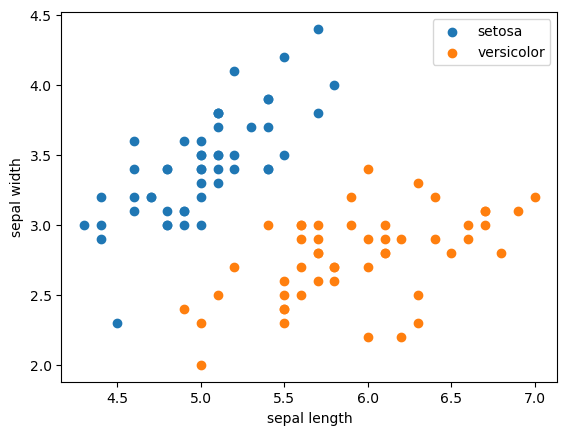

In [6]:
# visualize the dataset through a scatter plot
plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], label = 'setosa')
plt.scatter(data[50:100]['sepal length'], data[50:100]['sepal width'], label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [7]:
# divide the dataset into features and labels
X_train = np.array(data.iloc[:100, [0, 1]])
Y_train = np.array(data.iloc[:100, -1])

# make two labels be of different symbols
for i in range(len(Y_train)):
    if Y_train[i] == 0:
        Y_train[i] = -1

In [12]:
# my implement of perceptron
def fit(X_train, Y_train):
    # w is a vector of same dimension as features
    w = np.ones(len(X_train[0]), dtype = np.float32)
    b = 0
    # learning rate of the model
    l_rate = 0.01

    # iterating until there is no misclassified samples in train set
    while True:
        # count of misclassified samples
        count = 0

        for i in range(len(X_train)):
            result = 0
            # calculate w^x^ ^stands for a vector
            for j in range(len(w)):
                result += w[j] * X_train[i][j]
            # calculate y(w^x^ + b)
            result = Y_train[i] * (result + b)

            # if result <= 0, we find a misclassified sample
            if (result <= 0):
                count += 1
                # adjust parameters
                for j in range(len(w)):
                    w[j] += l_rate * Y_train[i] * X_train[i][j]
                b += l_rate * Y_train[i]
        
        # exit the loop if there is no misclassified sample found
        if count == 0:
            break
    
    return [w, b]

In [13]:
# train our model
[w, b] = fit(X_train, Y_train)

print(w)
print(b)

[ 0.7799957 -0.9999963]
-1.2100000000000009


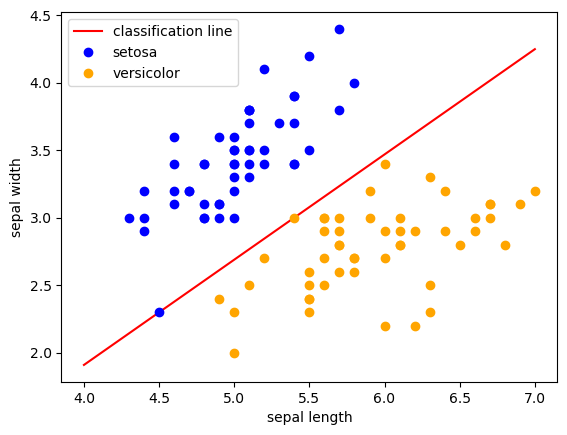

In [16]:
# visualize the result line
xs = np.linspace(4, 7, 10)
ys = -(w[0] * xs + b) / w[1]
plt.plot(xs, ys, 'r', label = 'classification line')

plt.plot(data[:50]['sepal length'], data[:50]['sepal width'], 'o', color = 'blue', label = 'setosa')
plt.plot(data[50:100]['sepal length'], data[50:100]['sepal width'], 'o', color = 'orange', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()